In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

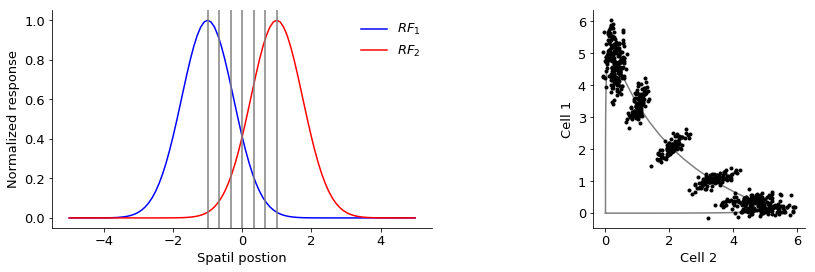

In [3]:
def make_rf(center, sigma):
    return lambda x: np.exp(-(x-center)**2 / 2 / sigma**2)

# RF Paramters and definition
rf_centers = [-1, 1]
rf_sigma = 0.75
rfs = [make_rf(center, rf_sigma) for center in rf_centers]

# Stimuli parameters and noise
input_mu = 5
input_sigma = 0.5 # shared input noise
output_sigma = 0.1 # individual output noise
n_flashes = 100 # points in each response cloud
flash_locations = np.linspace(-1.0, 1.0, 7)

# Plotting
plt.figure(figsize=(15, 4))
ax = plt.subplot(1, 2, 1)
x = np.linspace(-5, 5, 101)
ax.plot(x, rfs[0](x), 'b-', label='$RF_1$')
ax.plot(x, rfs[1](x), 'r-', label='$RF_2$');
ax.legend(frameon=False)
ax.set_xlabel('Spatil postion')
ax.set_ylabel('Normalized response')
for location in flash_locations: ax.axvline(location, color='gray')
    
ax = plt.subplot(1, 2, 2)
ax.plot(rfs[0](x)*input_mu, rfs[1](x)*input_mu, color='gray')
for location in flash_locations:
    inputs = input_mu + np.random.randn(n_flashes)*input_sigma
    outputs = [rf(location)*inputs + np.random.randn(n_flashes)*output_sigma for rf in rfs]
    ax.plot(outputs[0], outputs[1], 'k.')
ax.set_aspect(1)
ax.set_xlabel('Cell 2')
ax.set_ylabel('Cell 1');